### To Do
 - Sort issue with estimating the correction trials
 - Use pandas
 - 

In [28]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import numpy as np
import scipy.stats
import sys, os, re, csv
#import seaborn
import pandas as pd
import loadBehavioralData as ld
import mpld3
from pandas.io.json import json_normalize

%matplotlib inline
#plt.style.available # List of available plot styles
mpl.style.use('seaborn-colorblind')


# Computing
## Select animal

In [29]:
animalName = "Gouda"
dataPath = "C:\\Users\\Quentin Gaucher\\data\\ENS behavior\\data"
path = os.path.join(dataPath,animalName)
figSize = (10,5)

## Load files and compute trials

In [30]:
fileList = (os.listdir(path))
# remove ignored files (merged leftover)
fileList = [f for f in fileList if len(re.findall("_ignore", f)) == 0]
sessionNB = list()
sessionDate = list()
sessionSplit = list()
for files in fileList:
    sNB = int(re.findall('session([0-9]{1,3})',files)[0])
    if sNB > 95:
        sessionNB.append(sNB)
        sessionDate.append(re.findall('_([0-9]{6})',files)[0])
        sessionSplit.append(sessionDate[-1] + '_' + str(sessionNB[-1]))
#fileList = fileList(np.argsort(sessionNB))
fileList[:] = [fileList[i] for i in np.argsort(sessionNB)]
sessionDate[:] = [sessionDate[i] for i in np.argsort(sessionNB)]
sessionSplit[:] = [sessionSplit[i] for i in np.argsort(sessionNB)]
sessionNB.sort()

In [31]:
print(sessionNB)

[98, 104, 107, 109, 110, 113, 115, 117, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175]


In [32]:
allTrials = list()
allGoodTrials = list()
for files in fileList:
    print(files)
    filePath = os.path.join(path,files)
    dataObj = ld.dataManage(filePath,True)
    Trials = dataObj.getTrials()
    goodTrials = dataObj.getGoodTrials()
    allTrials.append(Trials)
    allGoodTrials.append(goodTrials)

Gouda_session172_191021.csv
Gouda_session104_180521_fused.csv
Gouda_session107_190521_fused.csv
Gouda_session109_200521.csv
Gouda_session10_250121.csv
Gouda_session110_210521_fused.csv
Gouda_session113_250521_fused.csv
Gouda_session115_260521_fused.csv
Gouda_session117_270521_fused.csv
Gouda_session119_280521.csv
Gouda_session11_250121.csv
Gouda_session120_310521.csv
Gouda_session121_010621.csv
Gouda_session122_020621.csv
Gouda_session123_030621_fused.csv
Gouda_session126_040621.csv
Gouda_session127_070621.csv
Gouda_session128_080621.csv
Gouda_session129_090621.csv
Gouda_session12_080221_fused.csv
Gouda_session130_100621.csv
Gouda_session131_110621.csv
Gouda_session132_140621.csv
Gouda_session133_150621.csv
Gouda_session134_160621.csv
Gouda_session135_170621.csv
Gouda_session137_180621.csv
Gouda_session138_210621.csv
Gouda_session139_220621.csv
Gouda_session140_230621.csv
Gouda_session141_240621.csv
Gouda_session142_250621.csv
Gouda_session143_070721.csv
Gouda_session144_080721.csv
Gou

In [33]:
dataObj = ld.dataManage(filePath,True)

In [34]:
allTrialsDF = ld.trialDataFrame(allGoodTrials,sessionDate)


In [35]:
hit = list()
miss = list()
trialLength = list()
hitTarget = list()
hitNTarget = list()
TTrial = list()
NTrial = list()
hitNTargetSplit = list()
NTTrialSplit = list()
hitTargetSplit = list()
TTrialSplit = list()
allData = pd.DataFrame()
c = 0
for trials in allGoodTrials:
    nHit = 0
    nMiss = 0
    nHitTarget = 0
    nHitNTarget = 0
    nTargetTrial = 0
    nNTargetTrial = 0
    nNTargetTrialSplit = dict()
    nHitNTargetSplit = dict()
    nTargetTrialSplit = dict()
    nHitTargetSplit = dict()
    df = pd.DataFrame(trials)
    for trial in trials:
        if trial['aborted']: # Skip aborted trials
            continue
        if trial['correction trial']: # Skip correction trials
            continue
        # Counts trials
        allData.append(trial,ignore_index=True)
        if trial['stim'] == 0:
            nTargetTrial += 1
            if trial['stimulus'] in nTargetTrialSplit:
                nTargetTrialSplit[trial['stimulus']] += 1
            else:
                nTargetTrialSplit[trial['stimulus']] = 1
        else:
            nNTargetTrial += 1
            if trial['stimulus'] in nNTargetTrialSplit:
                nNTargetTrialSplit[trial['stimulus']] += 1
            else:
                nNTargetTrialSplit[trial['stimulus']] = 1
        # Counts hits
        if trial['hit']:
            nHit = nHit + 1
            if trial['stim'] == 0:
                nHitTarget += 1
                if trial['stimulus'] in nHitTargetSplit:
                    nHitTargetSplit[trial['stimulus']] += 1
                else:
                    nHitTargetSplit[trial['stimulus']] = 1
            else:
                nHitNTarget += 1
                if trial['stimulus'] in nHitNTargetSplit:
                    nHitNTargetSplit[trial['stimulus']] += 1
                else:
                    nHitNTargetSplit[trial['stimulus']] = 1
        else:
            nMiss = nMiss + 1
    hit.append(nHit)
    miss.append(nMiss)
    trialLength.append(nHit + nMiss)
    hitTarget.append(nHitTarget)
    hitNTarget.append(nHitNTarget)
    TTrial.append(nTargetTrial)
    NTrial.append(nNTargetTrial)
    hitNTargetSplit.append(nHitNTargetSplit)
    NTTrialSplit.append(nNTargetTrialSplit)
    hitTargetSplit.append(nHitTargetSplit)
    TTrialSplit.append(nTargetTrialSplit)

hitRate = 100 * np.array(hit) / np.array(trialLength)
missRate = 100 * np.array(miss) / np.array(trialLength)
hitRateTarget = 100 * np.array(hitTarget) / np.array(TTrial)
hitRateNTarget = 100 * np.array(hitNTarget) / np.array(NTrial)

#sessionData = pd.DataFrame((hit,miss,TTrial,NTrial),index = sessionDate,columns = ('hit','miss','NTtrial','NNTTrial'))
sessionData = pd.DataFrame([list(x) for x in zip(hit, miss,TTrial,NTrial)],sessionDate,('hit','miss','NTTrial','NNTTrial'))
sessionData['hitRate'] = sessionData['hit'] / (sessionData['hit'] + sessionData['miss']) * 100

# sessionData

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in true_divide


In [36]:
#a = json_normalize(allGoodTrials,max_level=0)

In [37]:
# test = pd.concat([df,df],keys=['a','b'])
# test2 = pd.concat([test,df])
# test2

In [38]:
# sessionData['hitRate'].plot(yerr=sessionData['hitRate'],figsize=figSize,grid = True)
# plt.xticks(list(range(len(sessionData.index))), sessionData.index, rotation=90,fontsize=12)


In [39]:
sessionData.to_csv(animalName + '_sessionData.csv')

In [40]:
allDelays = list()
for trial in allTrials:
    delay = list()
    for t in trial:
        dR = 100
        dL = 100
        if len(t[13]) > 0:
            dR = t[13][0] - t[3]
        if len(t[15]) > 0:
            dL = t[15][0] - t[3]
        if min([dR, dL]) < 99:
            delay.append(min([dR, dL]))
    allDelays.append(delay)

In [41]:
meanDelay = list()
errDelay = list()
for delay in allDelays:
    meanDelay.append(np.mean(delay))
    errDelay.append(np.std(delay))

# Plots
## Delay before response

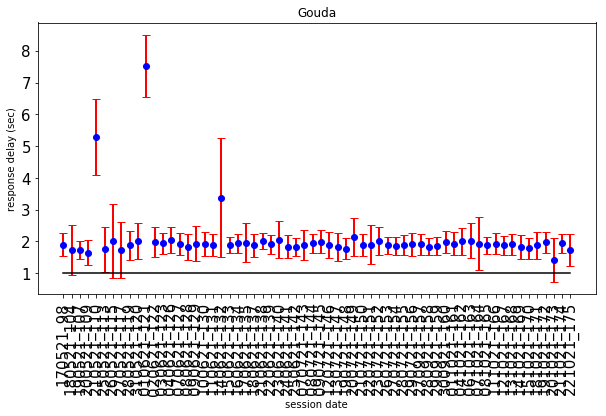

In [42]:

plt.figure(figsize=figSize)
plt.errorbar(sessionSplit,meanDelay,yerr=errDelay,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.plot(sessionSplit,[1]*len(sessionSplit),color='k')
plt.xlabel('session date')
plt.ylabel('response delay (sec)')
plt.title(animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## proportion of aborted trials

No handles with labels found to put in legend.


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text yticklabel objects>)

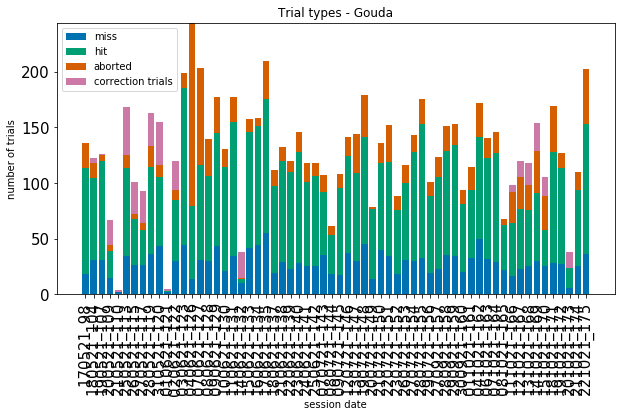

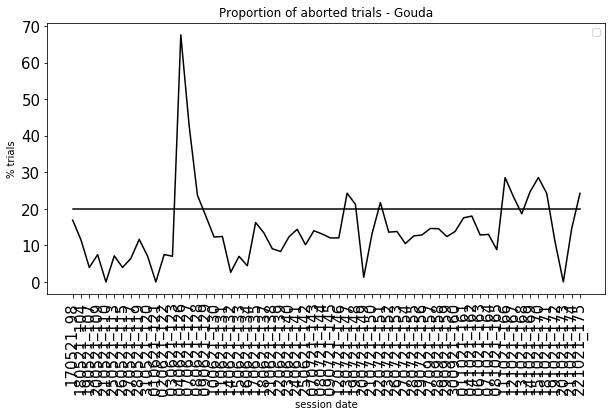

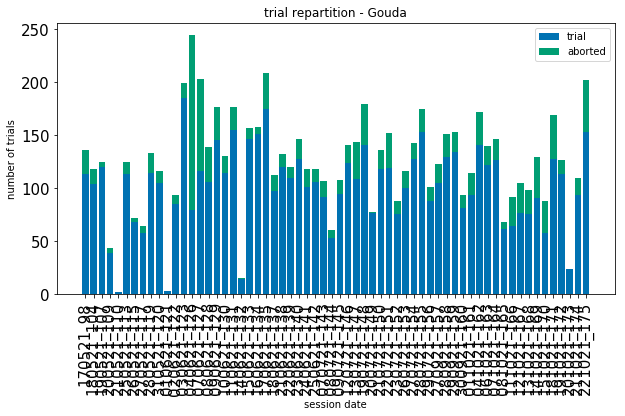

In [43]:
# stacked bars with number of hit, miss, aborted trials, correction trials
trialLength = list()
nAborted = list()
nCorrection = list()
hit = list()
miss = list()
Weird = list()

for trials in allGoodTrials:
    #trialLength.append(len(trials))
    #a = [(i['gotReward']) for i in trials]
    nAb = 0
    nCo = 0
    nHit = 0
    nMiss = 0
    nWeird = 0
    for trial in trials:
        if trial['aborted']:
            nAb += 1
        elif trial['correction trial']:
            nCo += 1
        elif trial['hit']:
            nHit = nHit + 1
        elif not trial['hit']:
            nMiss = nMiss + 1
        else:
            nWeird += 1

    hit.append(nHit)
    miss.append(nMiss)
    trialLength.append(len(trials))
    nAborted.append(nAb)
    nCorrection.append(nCo)
    Weird.append(nWeird)

hit = np.array(hit)
miss = np.array(miss)
trialLength = np.array(trialLength)
nAborted = np.array(nAborted)
nCorrection = np.array(nCorrection)
Weird = np.array(Weird)

plt.figure(figsize=figSize)
plt.bar(sessionSplit,miss,label="miss")
plt.bar(sessionSplit,hit,bottom = miss,label="hit")
plt.bar(sessionSplit,nAborted,bottom = miss + hit, label="aborted")
plt.bar(sessionSplit,nCorrection,bottom = hit + miss + nAborted,label="correction trials")
plt.legend()
plt.xlabel('session date')
plt.ylabel('number of trials')
plt.title("Trial types" + " - " + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

abortedProp = (nAborted / (hit + miss + nAborted + nCorrection)) * 100
plt.figure(figsize=figSize)
plt.plot(sessionSplit,abortedProp,color='k')
plt.plot(sessionSplit,[20]*len(sessionSplit),color='k')
plt.legend()
plt.xlabel('session date')
plt.ylabel('% trials')
plt.title("Proportion of aborted trials" + " - " + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

plt.figure(figsize=figSize)
plt.bar(sessionSplit,hit + miss,label="trial")
plt.bar(sessionSplit,nAborted,bottom = miss + hit, label="aborted")
plt.legend()
plt.xlabel('session date')
plt.ylabel('number of trials')
plt.title("trial repartition" + " - " + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

In [44]:
# nTrials = hit + miss + nAborted + nCorrection
# for i,tr in enumerate(sessionSplit):
#     print(tr + ' - ' + str(nTrials[i]))

## Percent correct (hit rate / false alarm)

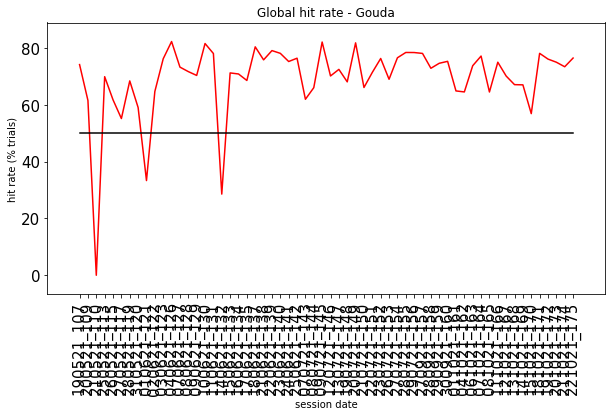

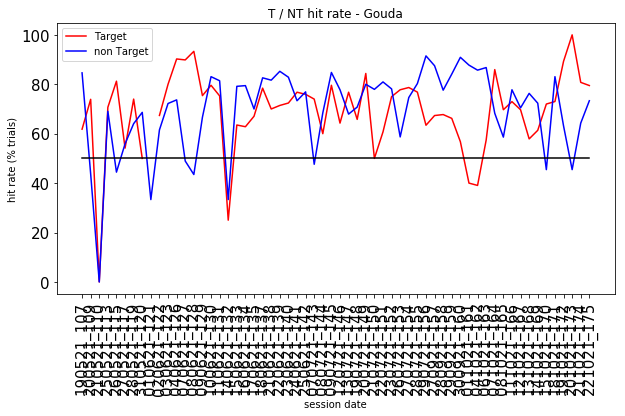

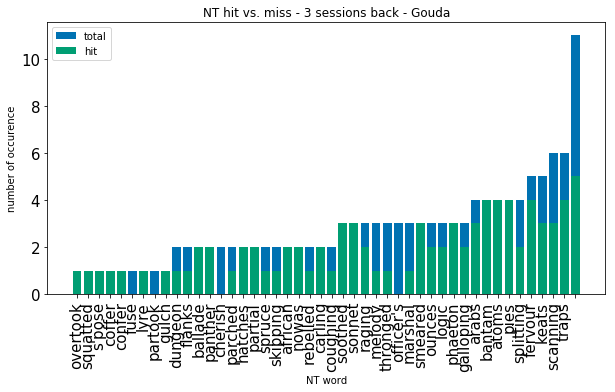

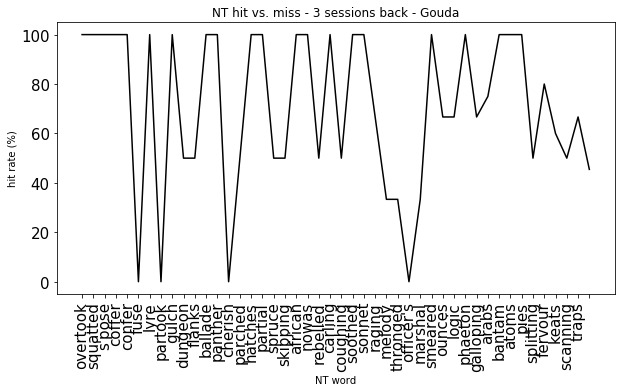

In [45]:


x = sessionSplit[2:]

# Global hit Rate
y = hitRate[2:]
# fig = plt.figure(figsize=figSize)
fig, ax = plt.subplots(figsize=figSize)
graph = plt.plot(x,y,color='r')
#plt.plot(sessionSplit,missRate,color='b')
plt.plot(x,[50]*len(x),color='k')
plt.xlabel('session date')
plt.ylabel('hit rate (% trials)')
plt.title('Global hit rate - ' + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

scatter = ax.scatter(x, y, s=200, alpha=0)
labels = ['{:.2%}'.format(i/100) for i in y]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
# mpld3.enable_notebook()
mpld3.save_html(fig, 'hitRate.html')
# mpld3.show()
# plt.show()

# Target / non target hit Rate
y1 = hitRateTarget[2:]
y2 = hitRateNTarget[2:]
# fig = plt.figure(figsize=figSize)
fig, ax = plt.subplots(figsize=figSize)
plt.plot(x,y1,color='r',label='Target')
plt.plot(x,y2,color='b',label = 'non Target')
plt.plot(x,[50]*len(x),color='k')
plt.legend()
plt.xlabel('session date')
plt.ylabel('hit rate (% trials)')
plt.title('T / NT hit rate - ' + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

# scatter = ax.scatter(x, y, s=200, alpha=0)
# labels = ['{:.2%}'.format(i/100) for i in y]
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.enable_notebook()

# mpld3.save_html(fig, 'hitRate.html')
# mpld3.show()

# plt.show()

# pool NT trials
pooledNThit = dict()
pooledNTtrials = dict()
nSeesionBack = 3
panel = range(len(sessionSplit)-nSeesionBack,len(sessionSplit))

for t in panel:
    for k in NTTrialSplit[t].keys():
        if 'CoTr' in k:
            continue
        pooledNThit[k] = 0
        pooledNTtrials[k] = 0

for t in panel:
    for k in NTTrialSplit[t].keys():
        if 'CoTr' in k:
            continue
        pooledNTtrials[k] = pooledNTtrials[k] + NTTrialSplit[t][k]
    for k in hitNTargetSplit[t].keys():
        if 'CoTr' in k:
            continue
        pooledNThit[k] = pooledNThit[k] + hitNTargetSplit[t][k]


    #     if k in pooledNTtrials:
    #         pooledNTtrials[k] = pooledNTtrials[k] + NTrialSplit[t][k]
    #     else:
    #         pooledNTtrials[k] = NTrialSplit[t][k]
    # for k in hitNTargetSplit[t].keys():
    #     if k in pooledNThit:
    #         pooledNThit[k] = pooledNThit[k] +hitNTargetSplit[t][k]
    #     else:
    #         pooledNThit[k] = hitNTargetSplit[t][k]
# hitNTargetSplit
# NTrialSplit

x = list(pooledNThit.keys())
y1 = list(pooledNTtrials.values())
y2 = list(pooledNThit.values())

# Sort by number of presentations 
x[:] = [x[i] for i in np.argsort(y1)]
y2[:] = [y2[i] for i in np.argsort(y1)]
y1.sort() 

fig, ax = plt.subplots(figsize=figSize)
plt.bar(x, y1, label='total')
plt.bar(x, y2, label='hit')
# ax2 = ax.twinx()
# ax2.plot(list(pooledNThit.keys()), np.array(list(pooledNThit.values()))/np.array(list(pooledNTtrials.values())),color='r')
plt.xlabel('NT word')
plt.ylabel('number of occurence')
plt.title('NT hit vs. miss - ' + str(nSeesionBack) + ' sessions back - ' + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.show()

# pooledNTtrials
fig, ax = plt.subplots(figsize=figSize)
plt.plot(x,100*np.array(y2)/np.array(y1),color='k')
plt.xlabel('NT word')
plt.ylabel('hit rate (%)')
plt.title('NT hit vs. miss - ' + str(nSeesionBack) + ' sessions back - ' + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Hit rate - splited targets


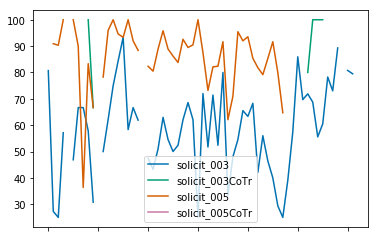

In [46]:
NtrialDB = pd.DataFrame(TTrialSplit, index=sessionSplit)
hitDB = pd.DataFrame(hitTargetSplit, index=sessionSplit)
hitDB = hitDB / NtrialDB *100

hitDB = hitDB.drop(columns= '')

hitDB.plot()



## Reaction time

In [47]:
allTrialsDF.columns

Index(['aborted', 'correction trial', 'gotReward', 'hit', 'lickL', 'lickR',
       'pokeL', 'pokeR', 'responseTime', 'stim', 'stim time', 'stimulus',
       'trialDuration', 'date', 'session nb'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  This is separate from the ipykernel package so we can avoid doing imports until


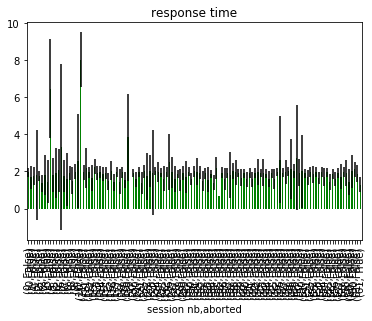

In [48]:
#allTrialsDF.boxplot(column='responseTime',by='date')
#allTrialsDF.plot.scatter ('session nb','responseTime')
avgRespTimes = allTrialsDF.groupby(("session nb","aborted")).agg([np.mean, np.std])
avgRespTimes = avgRespTimes['responseTime']
avgRespTimes.plot(kind = "bar", y = "mean", legend = False, 
          yerr = "std", title = "response time", color='green')



# Plot average response delay fct hit / miss / CT / aborted Global and over sessions
# 

In [49]:
avgRespTimes

mean       std
session nb aborted                    
0          False    1.951037  0.247140
           True     1.675374  0.624367
1          False    1.755044  0.509787
           True     1.798886  2.420571
2          False    1.748382  0.253098
           True     1.365540  0.457560
3          False    1.802131  1.092845
           True     1.440560  1.155718
4          False    6.466975  2.645886
5          False    1.787704  0.911893
           True     1.935942  1.353970
6          False    2.054345  1.170728
           True     3.305950  4.463418
7          False    1.749305  0.845067
           True     1.574100  1.419296
8          False    1.928887  0.378971
           True     1.500258  0.729550
9          False    1.996382  0.407306
           True     2.553145  2.548375
10         False    8.016160  1.480721
11         False    1.959149  0.394104
           True     2.200856  1.067717
12         False    1.959706  0.291128
           True     1.653329  0.701230
13         False    2.258246  0.392407
           True     1.932985  0.380667
14         False    1.961871  0.328295
           True     1.866709  0.361435
15         False    1.933168  0.316834
           True     1.473406  0.468113
...                      ...       ...
46         True     2.630200  2.350769
47         False    1.926741  0.249870
           True     1.970150  0.661604
48         False    2.011101  0.229452
           True     2.130835  1.624138
49         False    2.034068  0.380107
           True     2.740961  2.814218
50         False    1.943784  0.708452
           True     2.003684  1.960891
51         False    1.898406  0.238601
           True     1.689300  0.409287
52         False    1.965667  0.253715
           True     1.837257  0.457508
53         False    1.957778  0.255678
           True     1.660054  0.323235
54         False    1.958114  0.269983
           True     1.711777  0.492749
55         False    1.958293  0.244216
           True     1.436797  0.445533
56         False    1.862120  0.261560
           True     1.581387  0.390918
57         False    1.932124  0.276251
           True     1.728251  0.697307
58         False    1.981911  0.257538
           True     1.936986  0.705110
59         False    1.419108  0.700957
60         False    1.999149  0.873326
           True     2.113312  0.421818
61         False    1.873125  0.459931
           True     1.283096  0.408148

[121 rows x 2 columns]

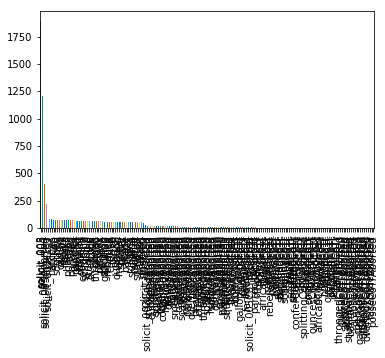

In [50]:
#allTrialsDF['stimulus'].plot.hist()
allTrialsDF['stimulus'].value_counts().plot(kind='bar')

In [51]:
sessionIdx = 19
trials = allGoodTrials[sessionIdx]
nHit = 0
nMiss = 0
rew_sides = list()
for trial in trials:
    if trial['aborted']:
        continue
    if trial['correction trial']:
        continue
    if trial['hit']:
        nHit = nHit + 1
    else:
        nMiss = nMiss + 1

    rew_sides.append(trial['stim'])
print(sessionSplit[sessionIdx])
print('n hit : ' + str(nHit))
print('n miss : ' + str(nMiss))
print('total trials : ' + str(len(allGoodTrials[sessionIdx])))
print('reward side : ' + str(sum(rew_sides)) + ' right - ' + str(len(rew_sides)) + ' trials - ' + str(round(sum(rew_sides)/len(rew_sides)*100)) + '%')

140621_132
n hit : 4
n miss : 10
total trials : 38
reward side : 6 right - 14 trials - 43.0%


In [52]:

# fig, ax = plt.subplots()
# N = 100

# scatter = ax.scatter(np.random.normal(size=N),
#                      np.random.normal(size=N),
#                      c=np.random.random(size=N),
#                      s=1000 * np.random.random(size=N),
#                      alpha=0.3,
#                      cmap=plt.cm.jet)
# ax.grid(color='white', linestyle='solid')

# ax.set_title("Scatter Plot (with tooltips!)", size=20)

# labels = ['point {0}'.format(i + 1) for i in range(N)]
# tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
# mpld3.plugins.connect(fig, tooltip)

# mpld3.show()

In [53]:
trial

{'stim': 0,
 'stim time': 1743.738,
 'hit': False,
 'correction trial': True,
 'aborted': False,
 'lickR': array([], dtype=float64),
 'lickL': array([], dtype=float64),
 'pokeR': array([], dtype=float64),
 'pokeL': array([], dtype=float64),
 'stimulus': '',
 'gotReward': 'none',
 'trialDuration': 10,
 'responseTime': 10}

## Bias (% response left)

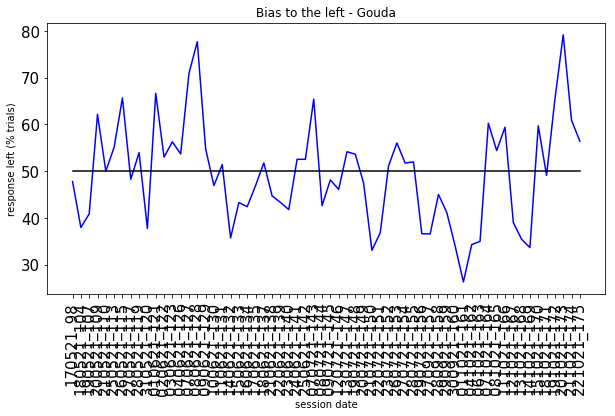

In [54]:
respL = list()
respR = list()
trialLength = list()
for trials in allTrials:
    nL = 0
    nR = 0
    for trial in trials:
        if trial[7]: # skip correction trials
            continue
        if trial[1] == 0:
            if trial[5]:
                nL = nL + 1
            else:
                nR = nR + 1
        else:
            if not trial[5]:
                nL = nL + 1
            else:
                nR = nR + 1
    respL.append(nL)
    respR.append(nR)
    trialLength.append(nL+nR)

rateL = 100 * np.array(respL) / np.array(trialLength)
rateR = 100 * np.array(respR) / np.array(trialLength)

plt.figure(figsize=figSize)
plt.plot(sessionSplit,rateL,color='b')
#plt.plot(sessionDate,missRate,color='b')
plt.plot(sessionSplit,[50]*len(sessionSplit),color='k')
plt.xlabel('session date')
plt.ylabel('response left (% trials)')
plt.title('Bias to the left - ' + animalName)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)

plt.show()